In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from ca2_analysis import ca2Data, extremePointIndices
%matplotlib inline
pd.set_option("display.precision", 2)
pd.set_option("display.expand_frame_repr", False)

In [2]:
def contentsOfDir(dir_path: str, search_terms: List[str]) -> Tuple[List[str], List[Tuple['str']]]:
  if os.path.isdir(dir_path):
    base_dir = dir_path
    for search_term in search_terms:
      glob_search_term = '*' + search_term + '*'
      file_paths = glob.glob(os.path.join(dir_path, glob_search_term))
      if len(file_paths) > 0:
        break
  else:
    # presume it's actually a single file path
    base_dir = os.path.dirname(dir_path)
    file_paths = [dir_path]
  files = []
  for file_path in file_paths:
      file_name, file_extension = os.path.splitext(os.path.basename(file_path))
      files.append((file_name, file_extension))
  return base_dir, files

In [3]:
def plotCa2Signals(
    time_stamps: np.ndarray,
    signal: np.ndarray,
    peak_indices: np.ndarray,
    trough_indices: np.ndarray,
    plot_title: str='',
    plot_smoothed_signal: bool=True
):
    plt.title(plot_title)
    if plot_smoothed_signal:
        plt.plot(time_stamps, signal)
    else:
        plt.scatter(time_stamps, signal, s=2, facecolors='none', edgecolors='g')    
    plt.scatter(time_stamps[peak_indices], signal[peak_indices], s=80, facecolors='none', edgecolors='b')
    plt.scatter(time_stamps[trough_indices], signal[trough_indices], s=80, facecolors='none', edgecolors='r')
    plt.show()

In [4]:
def runTestSuite():
    test_dir, test_files = contentsOfDir(dir_path='./test_data', search_terms=['.xlsx'])
    for file_name, file_extension in test_files:
        time_stamps, signal = ca2Data(os.path.join(test_dir, file_name + file_extension))
        peak_indices, trough_indices = extremePointIndices(
            signal,
            min_height_separation=25.0,
            min_width_separation=45
        )
        plotCa2Signals(time_stamps, signal, peak_indices, trough_indices, file_name)

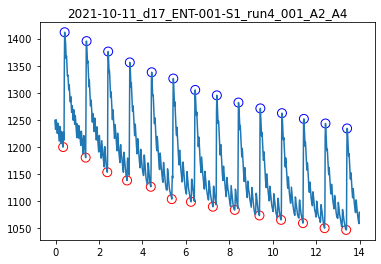

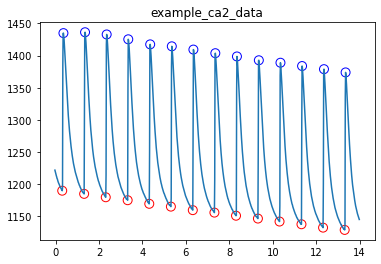

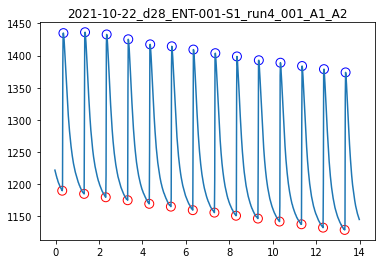

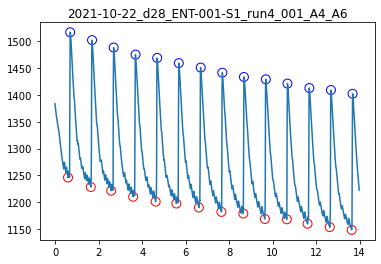

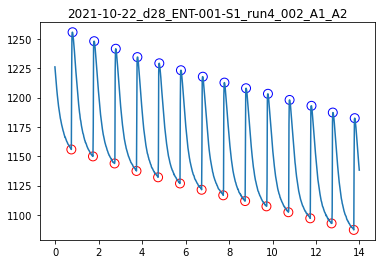

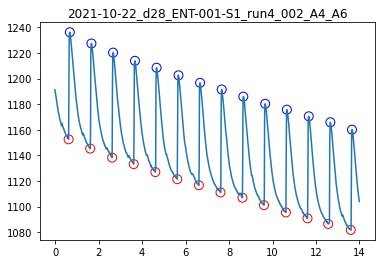

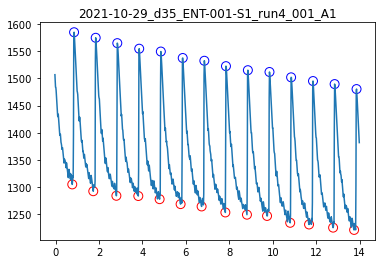

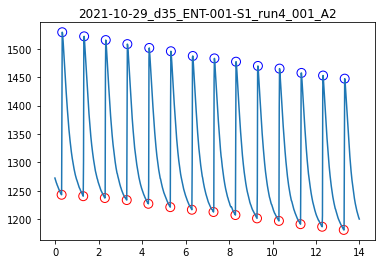

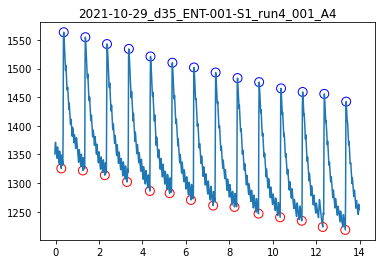

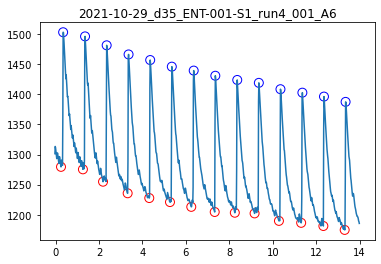

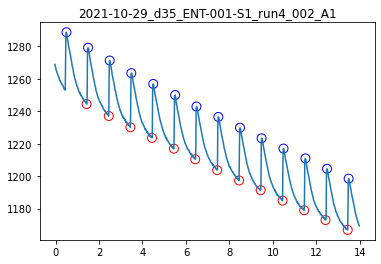

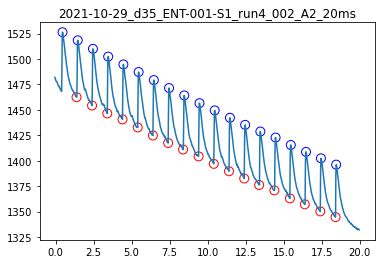

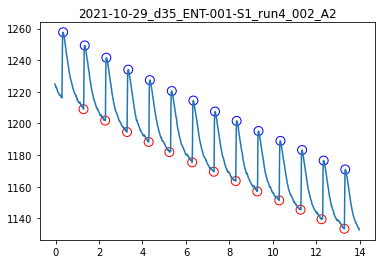

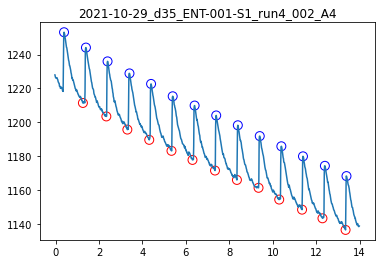

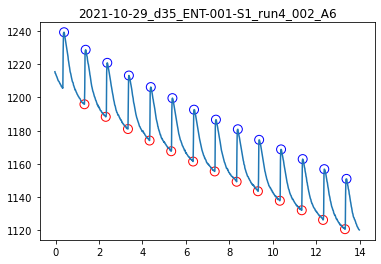

In [5]:
runTestSuite()